In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('./dataset/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
def MyLabelEncoder(column_name, df) :
    unique_vals = df[column_name].unique()

    labelEncoder = {}
    i = 0
    for val in unique_vals:
        labelEncoder[val] = i
        i += 1
    
    return labelEncoder;


In [8]:
labelEncoding_ocean = MyLabelEncoder('ocean_proximity', df)
df['ocean_proximity'] = df['ocean_proximity'].map(labelEncoding_ocean)
df.dropna(inplace=True)

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [10]:
y_data = df['median_house_value'].values.reshape(-1)  # column vector
x_data = df.drop(columns=['median_house_value']).values  # numpy 2D array

In [11]:
class MyLinearRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.loss_e = []

    def fit(self, X, y, epochs=100):
        self.w, self.w0 = self.gradientDescent(X, y, self.lr, epochs)

    def hypothesis(self, X, w, w0):
        return X.dot(w) + w0

    def loss(self, X, w, w0, y):
        ypred = self.hypothesis(X, w, w0)
        return np.mean((ypred - y) ** 2)

    def predict(self, X):
        return self.hypothesis(X, self.w, self.w0)

    def gradientDescent(self, X, y, lr=0.01, epochs=100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 0
        self.loss_e = [self.loss(X, w, w0, y)]

        for e in range(epochs):
            ypred = self.hypothesis(X, w, w0)

            grads = np.mean((ypred-y)*X.T,axis =1)
        
            w = w - lr * grads
            w0 = w0 - lr * np.mean(ypred - y)
        
            self.loss_e.append(self.loss(X, w, w0, y))
            
        return w, w0


In [12]:
x_data.shape, y_data.shape

((20433, 9), (20433,))

In [13]:
clf = MyLinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.8)

In [14]:
u = x_train.mean(axis=0)    
sigma = x_train.std(axis=0) 

x_train = (x_train - u) / sigma
x_test  = (x_test - u) / sigma

In [15]:
clf.fit(x_train, y_train)

In [16]:
y_pred = clf.predict(x_test)

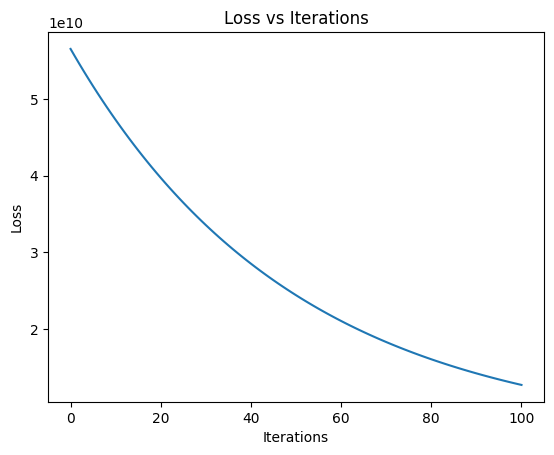

In [25]:
plt.plot(np.arange(len(clf.loss_e)), clf.loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

In [86]:
r2_score(y_test, y_pred)

0.04064695923640027

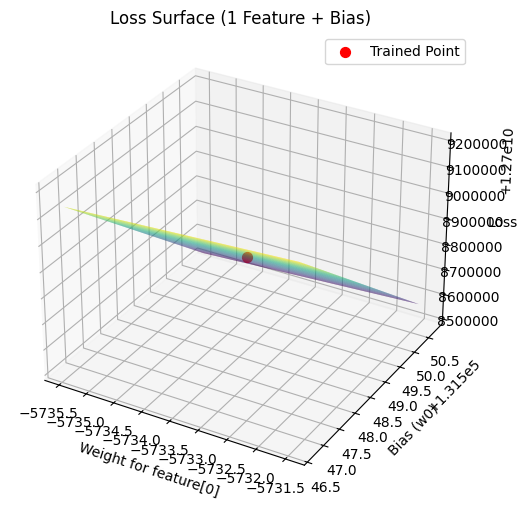

In [26]:
from mpl_toolkits.mplot3d import Axes3D


feature_idx = 0  
w_trained = clf.w.copy()
w0_trained = clf.w0

w_range = np.linspace(w_trained[feature_idx]-2, w_trained[feature_idx]+2, 100)
w0_range = np.linspace(w0_trained-2, w0_trained+2, 100)

W, W0 = np.meshgrid(w_range, w0_range)
Loss = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w_temp = w_trained.copy()
        w_temp[feature_idx] = W[i, j]   # change only one feature weight
        Loss[i, j] = clf.loss(x_train, w_temp, W0[i, j], y_train)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W, W0, Loss, cmap="viridis", alpha=0.8)

ax.scatter(w_trained[feature_idx], w0_trained,
           clf.loss(x_train, w_trained, w0_trained, y_train),
           color="red", s=50, label="Trained Point")

ax.set_xlabel(f"Weight for feature[{feature_idx}]")
ax.set_ylabel("Bias (w0)")
ax.set_zlabel("Loss")
ax.set_title("Loss Surface (1 Feature + Bias)")
ax.legend()
plt.show()
